In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.listdir("/content/drive/MyDrive")

['How to get started with Drive.pdf',
 'IMG_0426.jpg',
 'Classroom',
 'PREBOARD-1 Shreya Mahara X-C 41Hindi.pdf',
 'PREBOARD-1 Shreya Mahara X-C 41Maths.pdf',
 'PREBOARD-1 Shreya Mahara X-C 41Science.pdf',
 'PREBOARD-2 Shreya Mahara 10-C 41COMPUTER.pdf',
 'PRBOARD-2 Shreya Mahara 10-C 41 Social Studies.pdf',
 'PREBOARD-2 Shreya Mahara 10-C 41ENGLISH.pdf',
 'PREBOARD-2 Shreya Mahara 10-C 41HINDI.pdf',
 'PREBOARD-2 Shreya Mahara 10-C 41SCIENCE.pdf',
 'PREBOARD-2 Shreya Mahara 10-C 41MATHS.pdf',
 'PREBOARD-1 Shreya Mahara X-C 41English.pdf',
 'PREBOARD-1 Shreya Mahara X-C 41 Computer.pdf',
 'PREBOARD-1 Shreya Mahara X-C 41Social Studies.pdf',
 'XC41ShreyaMahara.pdf',
 'Screenshot_2023-09-09-15-32-20-48_4336b74596784d9a2aa81f87c2016f50.jpg',
 'Colab Notebooks',
 'WIN_20231211_19_10_19_Pro.jpg',
 'WIN_20231211_19_10_01_Pro.jpg',
 'WIN_20231211_19_11_17_Pro.jpg',
 'WIN_20231211_19_11_19_Pro.jpg',
 'WIN_20231211_19_11_21_Pro.jpg',
 'WIN_20231211_19_11_23_Pro.jpg',
 'WIN_20231211_19_12_19_Pro.

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/fashionista_clean7375"
print(os.listdir(dataset_path)[:10])

['46541_sheer-bed-cardi-thrifted-cardigan-thrifted-blouse-jeffrey-campbell-wedges_400.jpg', '46542_combat-boots-dr-martens-boots-karmaloop-dress-leather-jacket-urban-outfitter_400.jpg', '46543_lita-platforms-jeffrey-campbell-shoes-black-lace-hm-shirt-camel-skirt_400.jpg', '46548_black-leather-jacket-black-studded-sweater-ruby-red-multi-colored-urban-outf_400.jpg', '46564_jeffrey-campbell-shoes-vintage-dress_400.jpg', '46565_forever-21-skirt_400.jpg', '46566_vintage-hat-vintage-blouse-forever-21-skirt_400.jpg', '46567_jeffrey-campbell-shoes-forever-21-pants_400.jpg', '46569_chanel-top_400.jpg', '46572_black-boots-peach-feminine-kimchi-blue-dress-black-leather-jacket-black-wo_400.jpg']


In [ ]:
import sys
sys.path.append('/content')

!ls /content/*.py

/content/body_encoder.py  /content/cloth_encoder.py  /content/model.py


In [ ]:
!pip install mediapipe torch torchvision opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
import sys, torch
sys.path.append('/content')

from body_encoder import BodyEncoder

model  = BodyEncoder(input_dim=7, embedding_dim=128)
dummy  = torch.randn(4, 7)       # 4 people, 7 measurements each
output = model(dummy)

print(f"Input  : {dummy.shape}")    # (4, 7)
print(f"Output : {output.shape}")   # (4, 128)
print(f"Norms  : {output.norm(dim=1).tolist()}")  # all ~1.0

Input  : torch.Size([4, 7])
Output : torch.Size([4, 128])
Norms  : [0.9999999403953552, 1.0, 1.0, 1.0]


In [ ]:
from cloth_encoder import ClothEncoder

model  = ClothEncoder(embedding_dim=128)
dummy  = torch.randn(4, 3, 224, 224)  # 4 clothing images
output = model(dummy)

print(f"Input  : {dummy.shape}")    # (4, 3, 224, 224)
print(f"Output : {output.shape}")   # (4, 128)
print(f"Norms  : {output.norm(dim=1).tolist()}")  # all ~1.0

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]


Input  : torch.Size([4, 3, 224, 224])
Output : torch.Size([4, 128])
Norms  : [1.0000001192092896, 0.9999999403953552, 1.0, 1.0]


In [ ]:
from model import ViBEModel

model       = ViBEModel(body_input_dim=7, embedding_dim=128)
dummy_body  = torch.randn(4, 7)
dummy_cloth = torch.randn(4, 3, 224, 224)

body_emb, cloth_emb = model(dummy_body, dummy_cloth)

print(f"Body  emb : {body_emb.shape}")   # (4, 128)
print(f"Cloth emb : {cloth_emb.shape}")  # (4, 128)
print(f"Body  norms : {body_emb.norm(dim=1).tolist()}")
print(f"Cloth norms : {cloth_emb.norm(dim=1).tolist()}")
print("✅ All rules satisfied!")

Body  emb : torch.Size([4, 128])
Cloth emb : torch.Size([4, 128])
Body  norms : [1.0, 0.9999999403953552, 1.0, 0.9999999403953552]
Cloth norms : [1.0, 1.0, 1.0, 1.0]
✅ All rules satisfied!


In [ ]:
import os
import shutil
from google.colab import drive

# Mount drive
drive.mount('/content/drive')

# Copy dataset from Drive to local disk
DRIVE_PATH = "/content/drive/MyDrive/fashionista_clean7375"
LOCAL_PATH = "/content/fashionista_dataset"

if not os.path.exists(LOCAL_PATH):
    print("Copying dataset from Drive to local disk...")
    shutil.copytree(DRIVE_PATH, LOCAL_PATH)
    print("[✓] Done!")
else:
    print("[✓] Dataset already exists locally")

# Verify
all_images = [f for f in os.listdir(LOCAL_PATH)
              if f.endswith(('.jpg','.jpeg','.png'))]
print(f"[✓] Total images found: {len(all_images)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copying dataset from Drive to local disk...
[✓] Done!
[✓] Total images found: 5181


In [ ]:
import os, sys, torch, cv2, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
sys.path.append('/content')

from body_encoder import BodyEncoder, BodyMeasurementExtractor
from cloth_encoder import ClothEncoder
from model import ViBEModel, recommend_clothing_for_body

# Initialize all models
body_encoder  = BodyEncoder(input_dim=7, embedding_dim=128)
cloth_encoder = ClothEncoder(embedding_dim=128)
vibe_model    = ViBEModel(body_input_dim=7, embedding_dim=128)
extractor     = BodyMeasurementExtractor()

body_encoder.eval()
cloth_encoder.eval()
vibe_model.eval()

IMAGE_DIR  = "/content/fashionista_dataset"
all_images = [f for f in os.listdir(IMAGE_DIR)
              if f.endswith(('.jpg','.jpeg','.png'))]

print(f"✅ Models initialized")
print(f"✅ Dataset loaded: {len(all_images)} images")

✅ Models initialized
✅ Dataset loaded: 5181 images


In [ ]:
# Uninstall and reinstall mediapipe fresh
!pip uninstall mediapipe -y
!pip install mediapipe==0.10.14 --quiet
print("Done! Now click Runtime → Restart Session")

Found existing installation: mediapipe 0.10.14
Uninstalling mediapipe-0.10.14:
  Successfully uninstalled mediapipe-0.10.14
Done! Now click Runtime → Restart Session


In [ ]:
import os, sys, torch, cv2, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
sys.path.append('/content')

# ── Permanent MediaPipe Fix ──────────────────────────────────
# Uses mediapipe.python directly — avoids .solutions issue
import mediapipe as mp
print("MediaPipe version:", mp.__version__)

# Force load solutions module
import importlib
import mediapipe.python.solutions.pose as mp_pose_module
import mediapipe.python.solutions.selfie_segmentation as mp_seg_module

print("✅ MediaPipe solutions loaded successfully!")

def extract_7_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return np.zeros(7, dtype=np.float32)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Use directly imported module — no mp.solutions
    with mp_pose_module.Pose(
        static_image_mode=True,
        min_detection_confidence=0.5
    ) as pose:
        result = pose.process(image_rgb)

    if not result.pose_landmarks:
        return np.zeros(7, dtype=np.float32)

    lm  = result.pose_landmarks.landmark
    pts = {
        "nose":           (lm[0].x,  lm[0].y),
        "left_shoulder":  (lm[11].x, lm[11].y),
        "right_shoulder": (lm[12].x, lm[12].y),
        "left_hip":       (lm[23].x, lm[23].y),
        "right_hip":      (lm[24].x, lm[24].y),
        "left_ankle":     (lm[27].x, lm[27].y),
        "right_ankle":    (lm[28].x, lm[28].y),
    }

    def dist(p1, p2):
        return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

    def mid(p1, p2):
        return ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)

    shoulder_mid       = mid(pts["left_shoulder"], pts["right_shoulder"])
    hip_mid            = mid(pts["left_hip"],      pts["right_hip"])
    ankle_mid          = mid(pts["left_ankle"],    pts["right_ankle"])
    shoulder_w         = dist(pts["left_shoulder"],pts["right_shoulder"])
    hip_w              = dist(pts["left_hip"],     pts["right_hip"])

    return np.array([
        dist(pts["nose"],    ankle_mid),   # height
        shoulder_w * 1.3,                  # bust
        hip_w * 0.85,                      # waist
        hip_w,                             # hip
        shoulder_w,                        # shoulder width
        shoulder_w / (hip_w + 1e-6),       # ratio
        dist(shoulder_mid, hip_mid),        # torso height
    ], dtype=np.float32)

print("✅ extract_7_features defined successfully!")

MediaPipe version: 0.10.14
✅ MediaPipe solutions loaded successfully!
✅ extract_7_features defined successfully!


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

LOCAL_PATH  = "/content/fashionista_dataset"
DRIVE_PATH  = "/content/drive/MyDrive/fashionista_clean7375"

if not os.path.exists(LOCAL_PATH):
    print("Copying dataset...")
    shutil.copytree(DRIVE_PATH, LOCAL_PATH)
    print("[✓] Done!")
else:
    print("[✓] Already exists")

IMAGE_DIR  = LOCAL_PATH
all_images = [f for f in os.listdir(IMAGE_DIR)
              if f.endswith(('.jpg','.jpeg','.png'))]
print(f"✅ Dataset: {len(all_images)} images")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[✓] Already exists
✅ Dataset: 5181 images


In [ ]:
from body_encoder import BodyEncoder

body_encoder = BodyEncoder(input_dim=7, embedding_dim=128)
body_encoder.eval()

results = []
success, failed = 0, 0

for img in all_images[:20]:
    path     = os.path.join(IMAGE_DIR, img)
    features = extract_7_features(path)

    if features.sum() == 0:
        failed += 1
        continue

    tensor = torch.tensor(features).unsqueeze(0)
    with torch.no_grad():
        embedding = body_encoder(tensor)

    results.append({
        "image"    : img,
        "features" : features,
        "embedding": embedding.squeeze(0).numpy()
    })
    success += 1

print(f"\n✅ Success: {success}  |  ⚠️ No pose: {failed}\n")
print(f"{'Image':<45} {'Shape':<12} {'Norm'}")
print("-" * 65)
for r in results[:5]:
    norm = round(float(np.linalg.norm(r['embedding'])), 4)
    print(f"{r['image'][:44]:<45} {str(r['embedding'].shape):<12} {norm}")

if results:
    print(f"\n7 features : {results[0]['features'].round(4)}")
    print(f"Embedding  : {results[0]['embedding'][:8].round(4)}...")
    print(f"\n✅ BodyEncoder input=7 → output=128 ✅")

/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



✅ Success: 18  |  ⚠️ No pose: 2

Image                                         Shape        Norm
-----------------------------------------------------------------
3473_black-vintage-dress-black-forever-21-ac  (128,)       1.0
341_black-worn-as-top-american-apparel-dress  (128,)       1.0
4012_white-aa-top_400.jpg                     (128,)       1.0
42649_4276723447_400.jpg                      (128,)       1.0
3615_red-creeper-demonia-shoes-cream-lace-fo  (128,)       1.0

7 features : [0.7387 0.3155 0.1229 0.1445 0.2427 1.6791 0.2542]
Embedding  : [ 0.0964  0.0515  0.0395 -0.0156 -0.1144 -0.0897  0.0125 -0.2071]...

✅ BodyEncoder input=7 → output=128 ✅


In [ ]:
from cloth_encoder import ClothEncoder
from cloth_encoder import cloth_transform

cloth_encoder = ClothEncoder(embedding_dim=128)
cloth_encoder.eval()

cloth_results = []

print("=" * 60)
print("  CLOTH ENCODER — Working on Fashionista Dataset")
print("=" * 60)

for img in all_images[:10]:
    path   = os.path.join(IMAGE_DIR, img)
    image  = Image.open(path).convert("RGB")
    tensor = cloth_transform(image).unsqueeze(0)

    with torch.no_grad():
        embedding = cloth_encoder(tensor)

    cloth_results.append({
        "image"    : img,
        "embedding": embedding.squeeze(0).numpy()
    })

print(f"\n✅ Cloth embeddings generated: {len(cloth_results)} images\n")
print(f"{'Image':<45} {'Shape':<12} {'L2 Norm'}")
print("-" * 65)
for r in cloth_results[:5]:
    norm = round(float(np.linalg.norm(r['embedding'])), 4)
    print(f"{r['image'][:44]:<45} {str(r['embedding'].shape):<12} {norm}")

print(f"\nFirst 8 values of cloth embedding:")
print(f"  {cloth_results[0]['embedding'][:8].round(4)}")
print(f"\n✅ ClothEncoder ResNet50 → output=128 ✅")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  CLOTH ENCODER — Working on Fashionista Dataset

✅ Cloth embeddings generated: 10 images

Image                                         Shape        L2 Norm
-----------------------------------------------------------------
3473_black-vintage-dress-black-forever-21-ac  (128,)       1.0
341_black-worn-as-top-american-apparel-dress  (128,)       1.0
4012_white-aa-top_400.jpg                     (128,)       1.0
42649_4276723447_400.jpg                      (128,)       1.0
3615_red-creeper-demonia-shoes-cream-lace-fo  (128,)       1.0

First 8 values of cloth embedding:
  [ 0.1113 -0.0873  0.0183 -0.0449 -0.0343 -0.0219 -0.0645  0.0397]

✅ ClothEncoder ResNet50 → output=128 ✅


In [ ]:
print("=" * 60)
print("  SHARED 128-DIM EMBEDDING SPACE VERIFICATION")
print("=" * 60)

body_embs  = []
cloth_embs = []
img_names  = []

for img in all_images[:15]:
    path     = os.path.join(IMAGE_DIR, img)
    features = extract_7_features(path)

    if features.sum() == 0:
        continue

    # Body embedding
    b_tensor = torch.tensor(features).unsqueeze(0)
    with torch.no_grad():
        b_emb = body_encoder(b_tensor).squeeze(0).numpy()

    # Cloth embedding
    image    = Image.open(path).convert("RGB")
    c_tensor = cloth_transform(image).unsqueeze(0)
    with torch.no_grad():
        c_emb = cloth_encoder(c_tensor).squeeze(0).numpy()

    body_embs.append(b_emb)
    cloth_embs.append(c_emb)
    img_names.append(img)

body_embs  = np.array(body_embs)
cloth_embs = np.array(cloth_embs)

print(f"\n  Body  embeddings shape : {body_embs.shape}")
print(f"  Cloth embeddings shape : {cloth_embs.shape}")
print(f"  Both 128-dim ✅\n")
print(f"  Body  L2 norms : {np.linalg.norm(body_embs,  axis=1).round(3).tolist()}")
print(f"  Cloth L2 norms : {np.linalg.norm(cloth_embs, axis=1).round(3).tolist()}")
print(f"\n  All norms ~1.0 = unit hypersphere ✅")

  SHARED 128-DIM EMBEDDING SPACE VERIFICATION


/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



  Body  embeddings shape : (13, 128)
  Cloth embeddings shape : (13, 128)
  Both 128-dim ✅

  Body  L2 norms : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  Cloth L2 norms : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

  All norms ~1.0 = unit hypersphere ✅


In [ ]:
from model import recommend_clothing_for_body

print("=" * 60)
print("  RECOMMENDATION ON FASHIONISTA DATASET")
print("=" * 60)

recs = recommend_clothing_for_body(
    body_embs[0],
    cloth_embs,
    img_names,
    top_k=4
)

print(f"\nQuery Person : {img_names[0]}")
print(f"\nTop 4 Recommended Clothing:")
for i, (name, dist) in enumerate(recs):
    print(f"  {i+1}. {name[:50]}   distance: {dist}")

  RECOMMENDATION ON FASHIONISTA DATASET

Query Person : 3473_black-vintage-dress-black-forever-21-accessories-silver-bracelet-beige-ban_400.jpg

Top 4 Recommended Clothing:
  1. 3473_black-vintage-dress-black-forever-21-accessor   distance: 1.389
  2. 43630_1364470511_400.jpg   distance: 1.3938
  3. 42584_1359332167_400.jpg   distance: 1.4157
  4. 47013_1330339598_400.jpg   distance: 1.4191


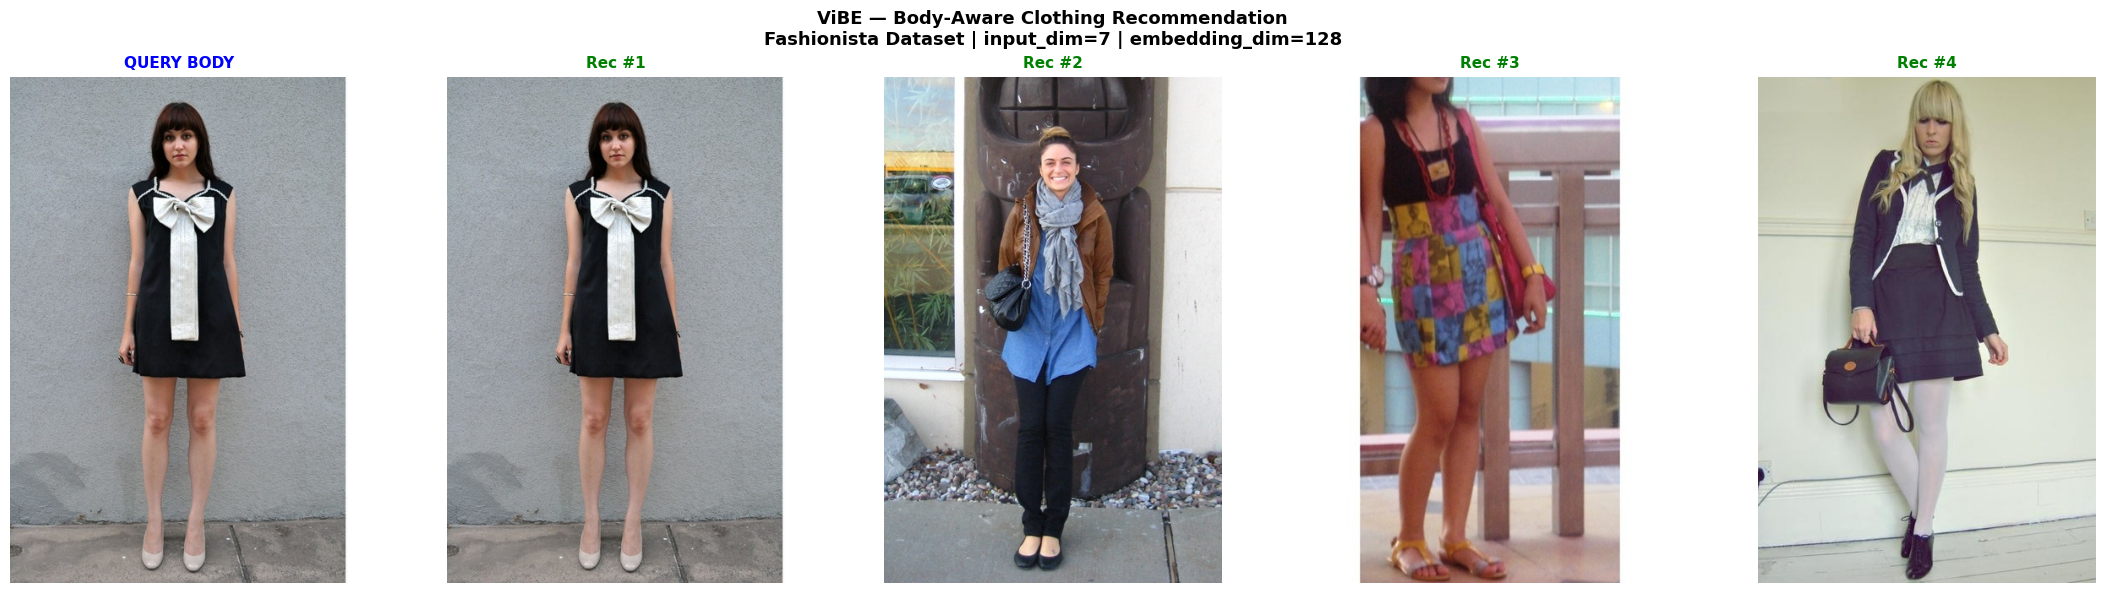

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))

# Query
axes[0].imshow(mpimg.imread(os.path.join(IMAGE_DIR, img_names[0])))
axes[0].set_title("QUERY BODY", color='blue',
                   fontsize=11, fontweight='bold')
axes[0].set_xlabel("Body Embedding\n128-dim ✅", fontsize=9)
axes[0].axis('off')

# Top 4 recommendations
for i, (rec_name, dist) in enumerate(recs):
    axes[i+1].imshow(mpimg.imread(os.path.join(IMAGE_DIR, rec_name)))
    axes[i+1].set_title(f"Rec #{i+1}", color='green',
                         fontsize=11, fontweight='bold')
    axes[i+1].set_xlabel(f"distance: {dist}", fontsize=9, color='gray')
    axes[i+1].axis('off')

plt.suptitle(
    "ViBE — Body-Aware Clothing Recommendation\n"
    "Fashionista Dataset | input_dim=7 | embedding_dim=128",
    fontsize=13, fontweight='bold'
)
plt.tight_layout()
plt.show()

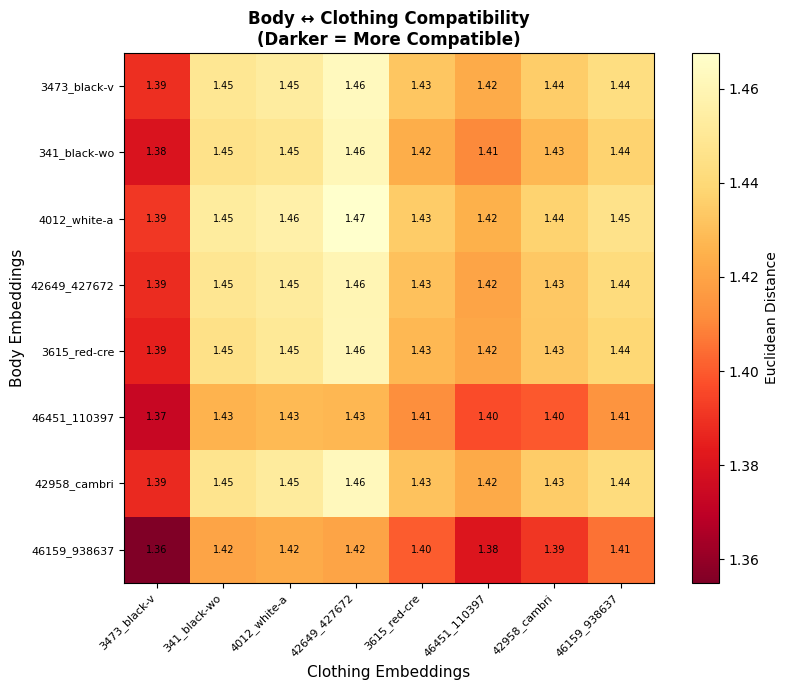

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(body_embs[:8], cloth_embs[:8])

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(dist_matrix, cmap='YlOrRd_r')

short_names = [n[:12] for n in img_names[:8]]
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(short_names, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(short_names, fontsize=8)
ax.set_xlabel("Clothing Embeddings", fontsize=11)
ax.set_ylabel("Body Embeddings",     fontsize=11)
ax.set_title(
    "Body ↔ Clothing Compatibility\n(Darker = More Compatible)",
    fontsize=12, fontweight='bold'
)

for i in range(8):
    for j in range(8):
        ax.text(j, i, f"{dist_matrix[i,j]:.2f}",
                ha='center', va='center', fontsize=7)

plt.colorbar(im, label='Euclidean Distance')
plt.tight_layout()
plt.show()